<a href="https://colab.research.google.com/github/Minayaterry/lab02-mt/blob/main/LAB_S06_MineriaDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Semana 6: Algoritmos para Diferentes Tipos de Tareas. Validación Cruzada y Métricas de Evaluación
**Nombre:**        MINAYA TORRES, Terry Agustin
                   TUNCAR ANDIA, Ronald Pablo

In [ ]:
# 1. Cargar Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
# 2. Cargar los datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
columnas = ['ID', 'ClumpThickness', 'UniformityCellSize', 'UniformityCellShape',
            'MarginalAdhesion', 'SingleEpithelialCellSize', 'BareNuclei',
            'BlandChromatin', 'NormalNucleoli', 'Mitoses', 'Class']
df = pd.read_csv(url, names=columnas)
df

,ID,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
# 3. Preprocesamiento
df.replace('?', np.nan, inplace=True)
df['BareNuclei'] = pd.to_numeric(df['BareNuclei'])
imputer = SimpleImputer(strategy='mean')
df.iloc[:, 1:-1] = imputer.fit_transform(df.iloc[:, 1:-1])
df['Class'] = df['Class'].map({2: 0, 4: 1})  # 0: benigno, 1: maligno
X = df.drop(columns=['ID', 'Class'])
y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

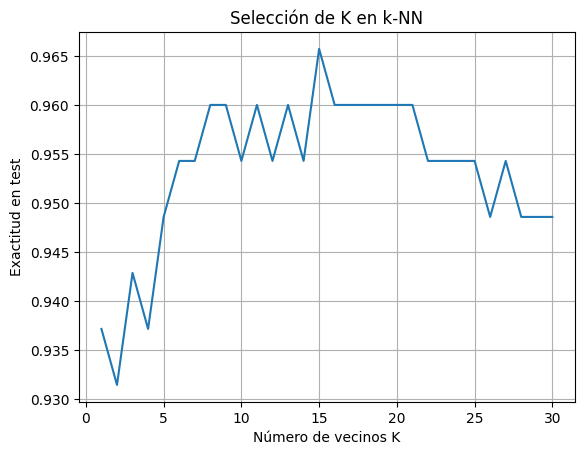

Mejor k encontrado: 15
Métricas sin balanceo:
[[112   3]
 [  3  57]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.95      0.95      0.95        60

    accuracy                           0.97       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175



In [ ]:
# 4. Modelo k-NN (sin balancear)
scores = []
k_range = range(1, 31)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.plot(k_range, scores)
plt.xlabel('Número de vecinos K')
plt.ylabel('Exactitud en test')
plt.title('Selección de K en k-NN')
plt.grid()
plt.show()
best_k = scores.index(max(scores)) + 1
print(f"Mejor k encontrado: {best_k}")
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Métricas sin balanceo:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# 5. Aplicación de SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
knn_smote = KNeighborsClassifier(n_neighbors=best_k)
knn_smote.fit(X_resampled, y_resampled)
y_pred_smote = knn_smote.predict(X_test)
print("Métricas con SMOTE:")
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))

Métricas con SMOTE:
[[112   3]
 [  3  57]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.95      0.95      0.95        60

    accuracy                           0.97       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175

